<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#a330f0;overflow:hidden;font-weight:500"><b>Udemy </b><br>EDA, Insights, Analysis</div>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from ydata_profiling import ProfileReport
%matplotlib inline  

# 🧾Lectura de Datos

In [2]:
df = pd.read_csv('udemy_courses.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [5]:
columnas = ["course_title","is_paid","price","num_subscribers","level","subject"]
df= df[columnas]

In [6]:
df.describe()

,price,num_subscribers
count,3678.000000,3678.000000
mean,66.049483,3197.150625
std,61.005755,9504.117010
min,0.000000,0.000000
25%,20.000000,111.000000
50%,45.000000,911.500000
75%,95.000000,2546.000000
max,200.000000,268923.000000


In [7]:
df.head()

,course_title,is_paid,price,num_subscribers,level,subject
0,Ultimate Investment Banking Course,True,200,2147,All Levels,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,All Levels,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,Intermediate Level,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,All Levels,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,Intermediate Level,Business Finance


In [8]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Pregunta a resolver:

¿Qué tanto influyen el precio, idioma, nivel y rating de cada curso en la demanda del producto vendido?

# 📉 Exploracion de datos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   course_title     3678 non-null   object
 1   is_paid          3678 non-null   bool  
 2   price            3678 non-null   int64 
 3   num_subscribers  3678 non-null   int64 
 4   level            3678 non-null   object
 5   subject          3678 non-null   object
dtypes: bool(1), int64(2), object(3)
memory usage: 147.4+ KB


<Axes: >

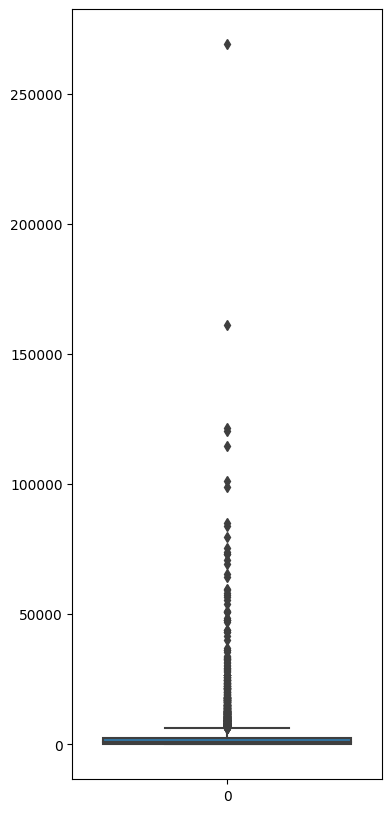

In [35]:
plt.figure(figsize=(4,10))
sns.boxplot(data=df.num_subscribers)

- Vemos que la mediana de numero de matriculados esta muy por debajo de 10000 estudiantes por curso

<Axes: >

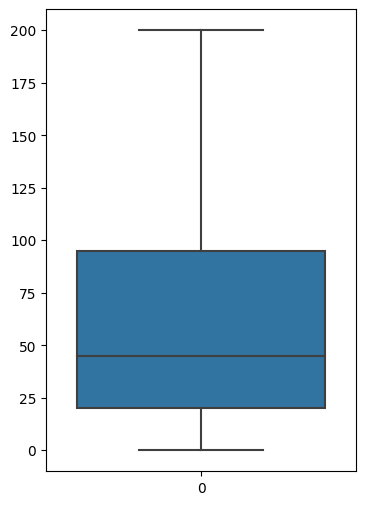

In [33]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df.price)

- El precio de cursos pagados se distribuye muy bien entre los rango de cero y 200, ademas la mediana de precios es muy barata en comparacion con los demas

Text(0, 0.5, 'Frecuencia')

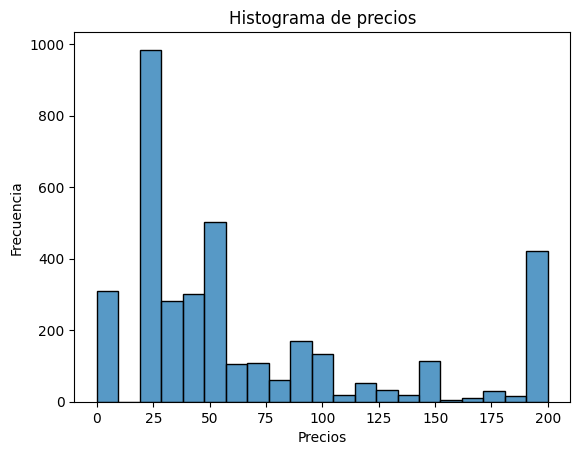

In [36]:
sns.histplot(data=df, x='price')

# Personalizamos el título y los ejes 
plt.title('Histograma de precios')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')

- Hay buena cantidad de precios de costo cero (gratis), ademas que la gran mayoria es de solo 25 dolares

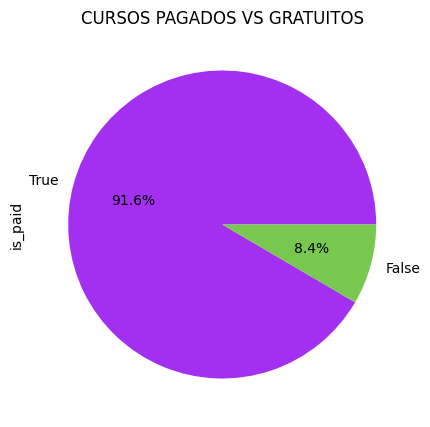

In [42]:
colors =  ["#a330f0", "#78C850"]
ax= df['is_paid'].value_counts(ascending=False).plot.pie(colors=colors,
            autopct='%1.1f%%',
            figsize=(8, 5))
plt.title('CURSOS PAGADOS VS GRATUITOS') 
plt.show()

Hay una gran diferencia entre la distribucion de tipos en el precio,si el curso es pagado o no/

<Axes: xlabel='level', ylabel='count'>

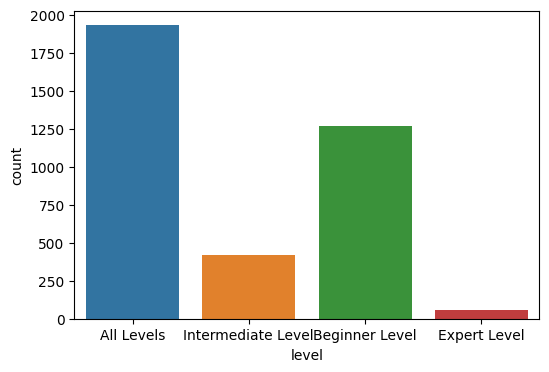

In [38]:
fig_dims = (6,4)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='level',data = df,ax=ax)

- La mayoria de cursos son de todos los niveles

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   course_title     3678 non-null   object
 1   is_paid          3678 non-null   bool  
 2   price            3678 non-null   int64 
 3   num_subscribers  3678 non-null   int64 
 4   level            3678 non-null   object
 5   subject          3678 non-null   object
dtypes: bool(1), int64(2), object(3)
memory usage: 147.4+ KB


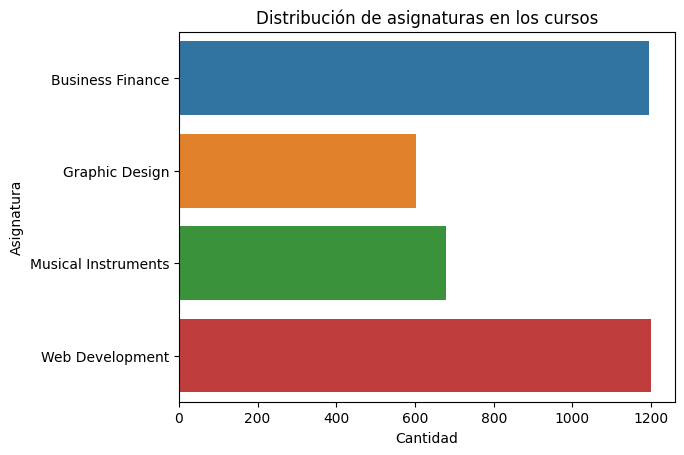

In [12]:
# Crea el countplot con barras horizontales
sns.countplot(data=df, y='subject')
plt.title('Distribución de asignaturas en los cursos')
plt.xlabel('Cantidad')
plt.ylabel('Asignatura')
plt.show()

- Hay pocas asignaturas pero aun asi, hay un distribucion balanceada para el numero de cursos

<Figure size 1000x800 with 0 Axes>

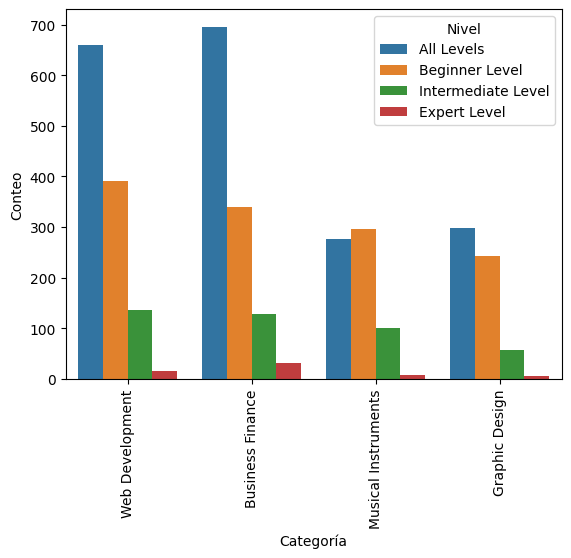

<Figure size 1000x800 with 0 Axes>

In [29]:
sns.countplot(x='subject', hue='level', data=df,
              order=df['subject'].value_counts().index,
              hue_order=['All Levels','Beginner Level', 'Intermediate Level','Expert Level'])

# Configuramos etiquetas y leyenda
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.legend(title='Nivel')

# Ajustamos las etiquetas del eje x
plt.xticks(rotation=90)

# Ajustamos el tamaño de la figura
plt.figure(figsize=(10, 8))


- Para las categorias MUSICAL y DISEÑO GRAFICO , tienen aproximadamente la misma cantidad en ciertos niveles de cursos

<b>Para responder a la pregunta sobre cómo influyen el precio, idioma, nivel y rating de cada curso en la demanda del producto vendido, podemos ayudarnos visualizando los siguientes graficos.<b>

# 🔍 Más EDA

POR CURSO

Text(0.5, 1.0, 'Top 20 Cursos con más Estudiantes Inscritos')

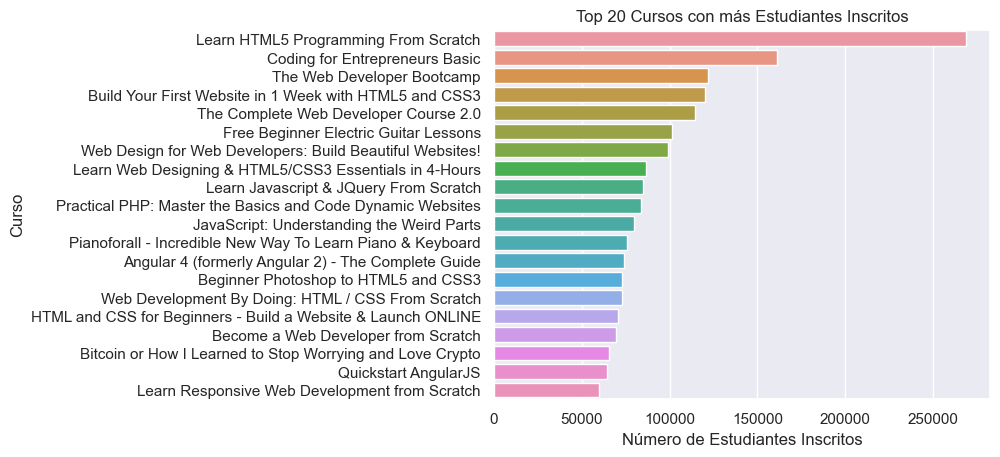

In [33]:
sns.set(style='darkgrid')

# Calculamos la suma de num_subscribers por curso
suma_inscritos_por_curso = df.groupby('course_title')['num_subscribers'].sum().reset_index()

# Ordenamos los datos por la columna 'num_subscribers' de forma descendente y seleccionamos los primeros 20 registros
top_20_cursos = suma_inscritos_por_curso.nlargest(20, 'num_subscribers')

# Creamos el gráfico de barras
sns.barplot(x='num_subscribers', y='course_title', data=top_20_cursos)

# Agregamos etiquetas a los ejes
plt.xlabel('Número de Estudiantes Inscritos')
plt.ylabel('Curso')
plt.title('Top 20 Cursos con más Estudiantes Inscritos')

- Los Nombres de cursos mas estuditantes son relacionados a la categoria de WEB Developer

POR CATEGORIA

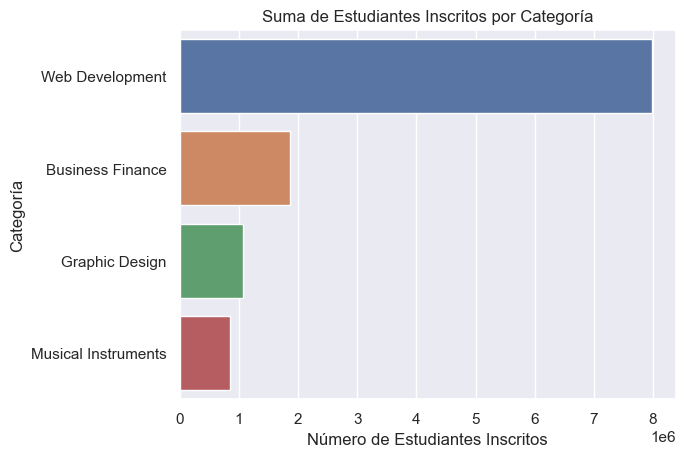

In [39]:
sns.set(style='darkgrid')

# Calculamos la suma de n_enrolled por categoría
suma_inscritos_por_categoria = df.groupby('subject')['num_subscribers'].sum().reset_index()

# Creamos el gráfico de barras
sns.barplot(x='num_subscribers', y='subject', data=suma_inscritos_por_categoria, order=suma_inscritos_por_categoria.sort_values('num_subscribers', ascending=False)['subject'])

# Agregagamos etiquetas a los ejes
plt.xlabel('Número de Estudiantes Inscritos')
plt.ylabel('Categoría')
plt.title('Suma de Estudiantes Inscritos por Categoría')

# Muestra el gráfico
plt.show()

POR NIVEL

Text(0.5, 1.0, 'Suma de Estudiantes Inscritos por Nivel')

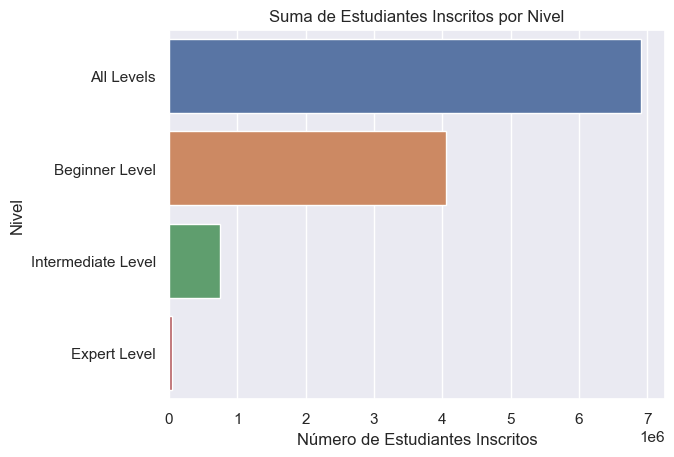

In [34]:
sns.set(style='darkgrid')

# Calculamos la suma de num_subscribers por nivel
suma_inscritos_por_nivel = df.groupby('level')['num_subscribers'].sum().reset_index()

# Crea el gráfico de barras
sns.barplot(x='num_subscribers', y='level', data=suma_inscritos_por_nivel, order=suma_inscritos_por_nivel.sort_values('num_subscribers', ascending=False)['level'])

# Agrega etiquetas a los ejes
plt.xlabel('Número de Estudiantes Inscritos')
plt.ylabel('Nivel')
plt.title('Suma de Estudiantes Inscritos por Nivel')

POR PRECIOS

Text(0.5, 1.0, 'Top 15 Precios con Más Estudiantes Inscritos')

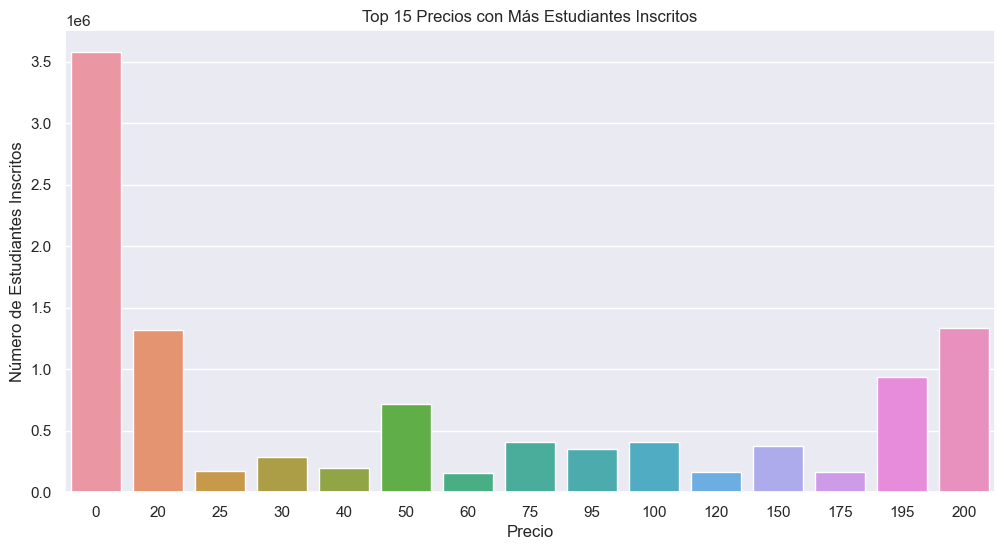

In [36]:
sns.set(style='darkgrid')

# Agrupamos por precio y sumamos el número de estudiantes inscritos
precio_n_enrolled = df.groupby('price')['num_subscribers'].sum().reset_index()

# Ordenamos por el número de estudiantes inscritos de forma descendente
precio_n_enrolled_sorted = precio_n_enrolled.sort_values('num_subscribers', ascending=False)

# Tomamos los 15 precios con más estudiantes inscritos
top_15_precios = precio_n_enrolled_sorted.head(15)

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='num_subscribers', data=top_15_precios)

# Agregamos etiquetas a los ejes
plt.xlabel('Precio')
plt.ylabel('Número de Estudiantes Inscritos')
plt.title('Top 15 Precios con Más Estudiantes Inscritos')

- Nos Damos cuenta de que hay mas alumnos en los cursos gratis como es de esperar, pero el precio con mayor conteo en los cursos (25 dolares), contiene muy pocos estudiantes 

Text(0.5, 1.0, 'Comparación de Estudiantes Inscritos por Pago')

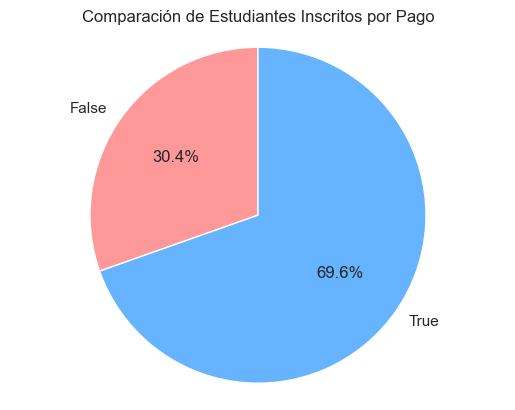

In [37]:
# Agrupamos los datos por la columna "is_paid" y calculamos la suma de estudiantes inscritos
grouped_data = df.groupby('is_paid')['num_subscribers'].sum()

# Configuramos los colores para el gráfico de torta
colors = ['#ff9999', '#66b3ff']

# Crear el gráfico de torta
plt.pie(grouped_data, labels=grouped_data.index, colors=colors, autopct='%.1f%%', startangle=90)

# Aseguramos que el gráfico sea un círculo en lugar de una elipse
plt.axis('equal')

# Agregamos un título
plt.title('Comparación de Estudiantes Inscritos por Pago')

- La diferencia disminuye si se trata del conteo de studiantes matriculados

# ☁️✨
<b>CREAMOS UN WORDCLOUD CON LAS PALABRAS MAS COMUNES EN LOS TITULOS DE LOS CURSOS<b>

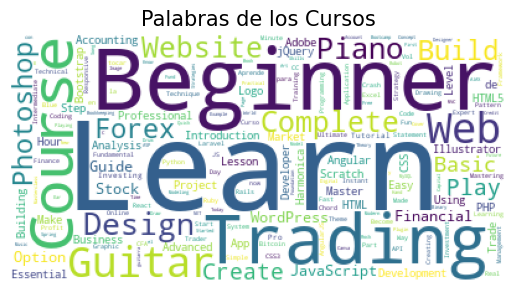

In [4]:
text = df["course_title"].values
wordcloud_for_travel=WordCloud(background_color='white',collocations=False).generate(" ".join(text))
plt.axis('off')
plt.title("Palabras de los Cursos",fontsize=15)
plt.imshow(wordcloud_for_travel)